In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
df.nunique()

,0
MedInc,12928
HouseAge,52
AveRooms,19392
AveBedrms,14233
Population,3888
AveOccup,18841
Latitude,862
Longitude,844
MedHouseVal,3842


In [12]:
df.shape

(20640, 9)

In [13]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
x = df.drop('MedHouseVal', axis=1)
df = df['MedHouseVal']

In [20]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, df, test_size= 0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [25]:
reg.score(x_train, y_train)

0.6125511913966952

In [26]:
reg.score(x_test, y_test)
# if this value is comes around 0.1484234353334 then we say that prediction is overfit.


0.5757877060324508

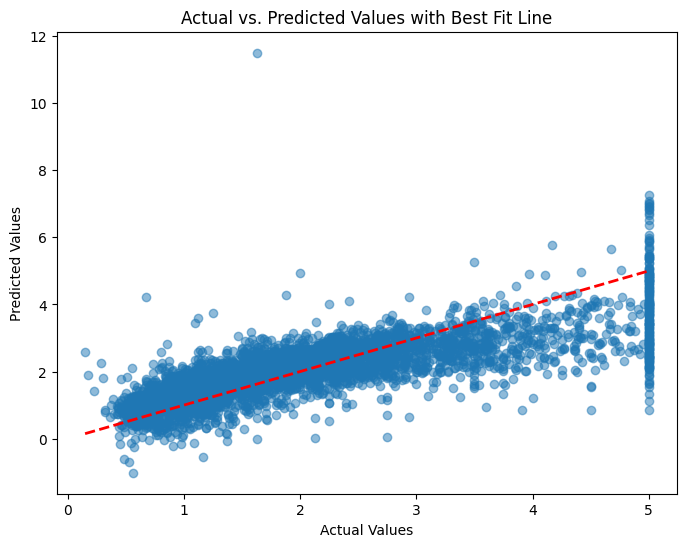

In [49]:
# but i also apply this
# let see what happend
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=5, max_iter = 100, tol = 0.1)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=5, max_iter=100, tol=0.1)

In [50]:
lasso_reg.score(x_train , y_train)

0.0006632193390732066

In [51]:
lasso_reg.score(x_test, y_test)

0.00013020631348259482

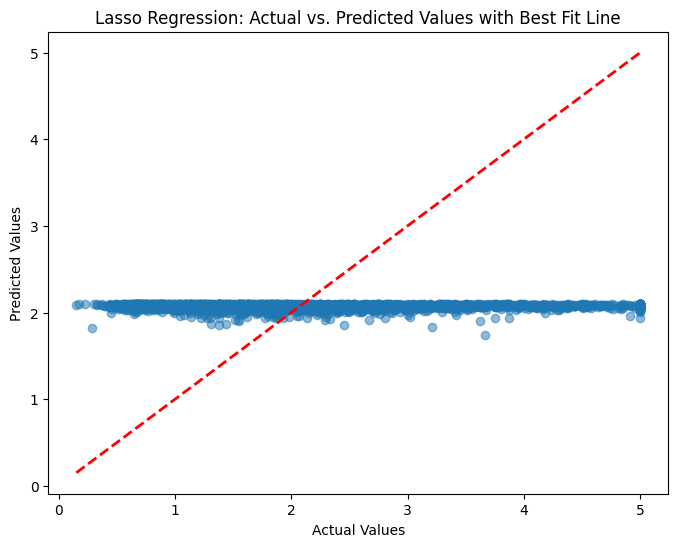

In [40]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [53]:
ridge_reg.score(x_train, y_train)

0.6124135516926354

In [55]:
ridge_reg.score(x_test, y_test)

0.578590589809215

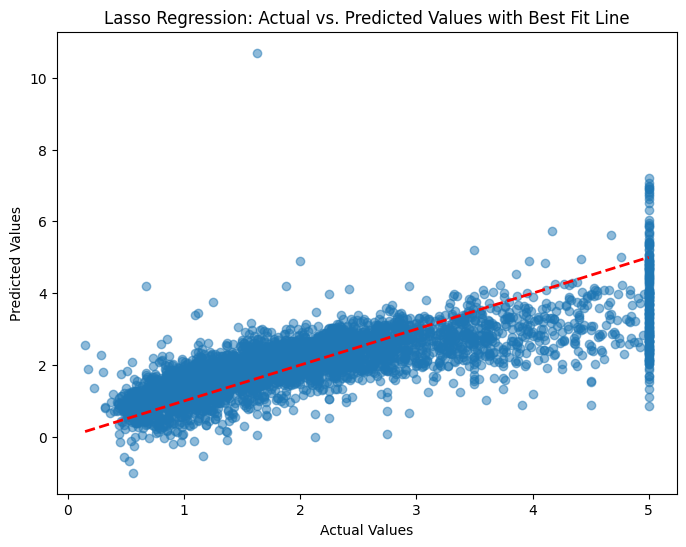

In [58]:
# Make predictions on the test set using the Lasso model
y_pred_ridge = ridge_reg.predict(x_test)

# Create a scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual vs. Predicted Values with Best Fit Line")

# Add the best-fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.show()

### Why the Lasso Model is Performing Poorly

Imagine you're trying to draw a picture of a house. You could try to draw every single detail, down to the last brick. But if you do that, you might end up with a drawing that is too busy and doesn't look like a house at all.

Lasso regression is like telling an artist to use as few lines as possible to draw the house. If you tell the artist to use too few lines, they might not be able to draw a very good picture of the house. This is what is happening with the Lasso model. The `alpha` value of 5 is like telling the artist to use only a few lines, so the model is too simple and it doesn't fit the data well.

### Why the Ridge and Linear Regression Models are Behaving Similarly

Ridge regression is like telling the artist to use a light touch when they are drawing the house. This will help to prevent the artist from making any one line too dark, but it won't force them to use fewer lines.

In this case, the `alpha` value of 50 is like telling the artist to use a very light touch. This doesn't have a big impact on the final drawing, which is why the Ridge and Linear regression models are behaving in a similar way. To see a bigger difference, you would need to use a much larger `alpha` value.